# Speech Data Analysis:

Dataset from https://archive.ics.uci.edu/dataset/174/parkinsons

### Importing all libraries:

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Reading the Data:

In [ ]:
df = pd.read_csv("SpeechData.csv")

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Checking for Null Values:

In [ ]:
# Display the dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Dropping the "name" column due to its non-contribution to analysis

In [ ]:
df = df.drop(columns=["name"], errors='ignore')

In [ ]:
# Apply standardization (Z-score normalization)

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('status')  # Exclude 'status' column

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Performed Standardization, ensuring all numeric features have mean = 0 and standard deviation = 1. \
Helps machine learning models converge faster and improves model performance.

## 1. Exploratory Data Analysis:

###**1.1 Checking Imbalance**

<Axes: xlabel='status', ylabel='count'>

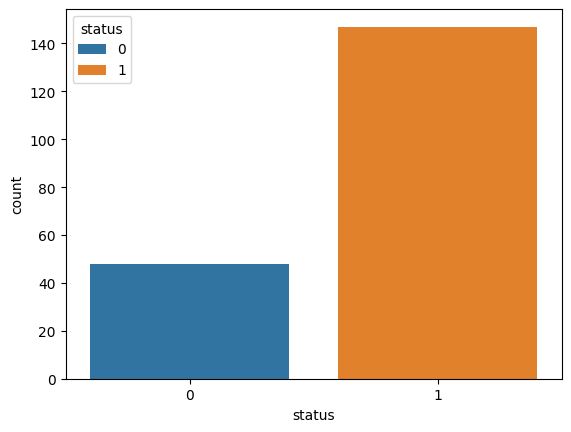

In [ ]:
#Balance of Data
sns.countplot(x='status',data=df, hue = 'status')

The bar chart illustrates the distribution of the target variable "status" in the dataset. It shows a significant class imbalance, where status = 1 (lindicating presence of PD) has a much higher count compared to status = 0 (indicating absence of PD). This imbalance may require techniques like SMOTE to balance the dataset for machine learning models

###**1.2 Feature Correlation**

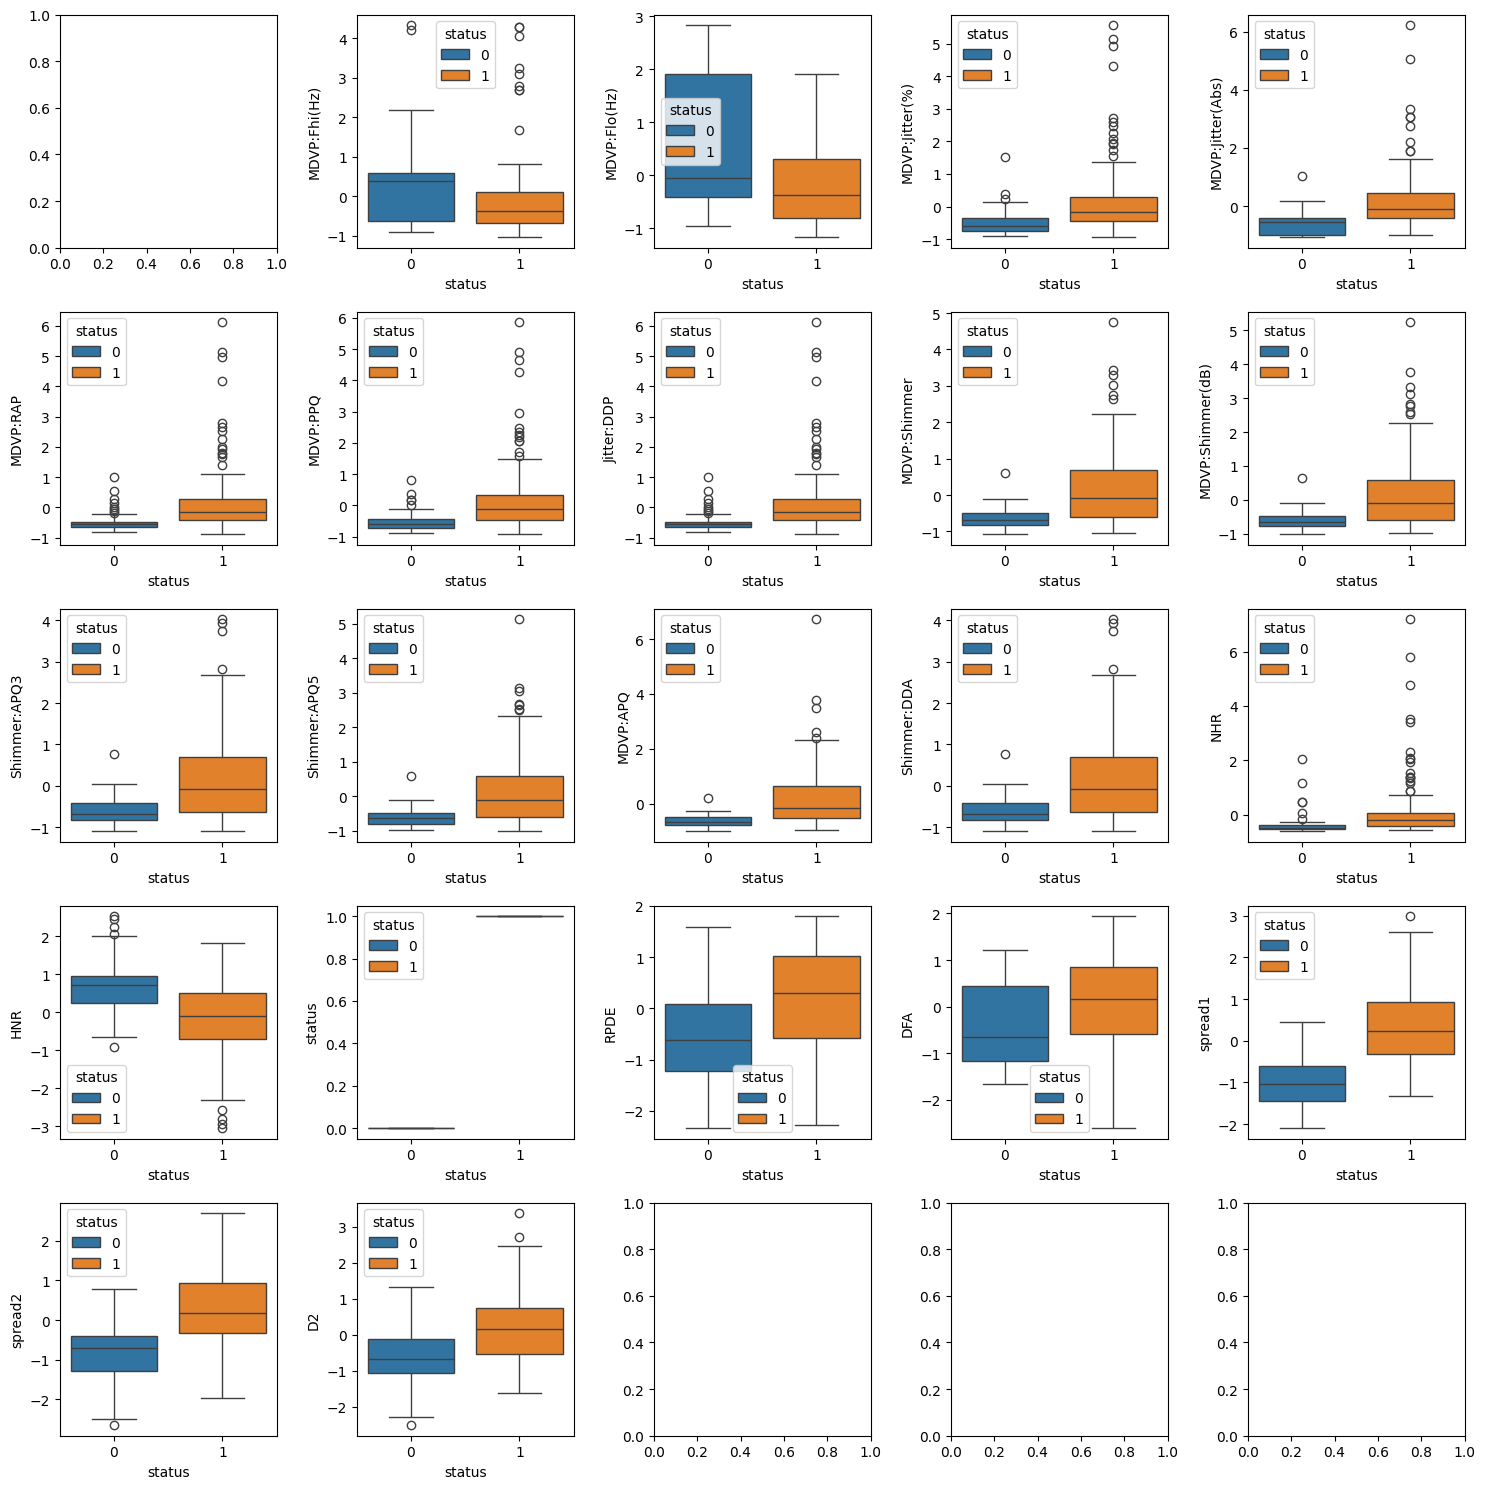

In [ ]:
#Box Plot
fig,axes = plt.subplots(5,5,figsize=(15,15))
axes = axes.flatten()


for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i], hue = 'status')
plt.tight_layout()
plt.show()

The box plots compare various speech-related features between the two classes of the "status" variable (0 and 1). Several features, such as MDVP:Jitter(%), Shimmer:APQ3, and NHR, show noticeable differences between the two groups, indicating potential discriminative power for classification. Additionally, the presence of outliers in multiple features suggests some variability in the data distribution, which may need further preprocessing, such as outlier removal or transformation.

## 2. Data PreProcessing:

###**2.1 Balancing the Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exploring Imabalance In Dataset
df['status'].value_counts()

,count
status,
1,147
0,48


Shows the imbalance between Healthy and PD patients

In [ ]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [ ]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

# Resampling Data
X, y = sm.fit_resample(X, y)

print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


The SMOTE (Synthetic Minority Over-sampling Technique) method is used here to handle class imbalance in the dataset. The sm.fit_resample(X, y) function generates synthetic samples for the minority class, ensuring both classes have an equal number of instances. This helps improve the model's performance by preventing bias toward the majority class.

In [ ]:
# Scaling features between -1 and 1  for normalization
scaler = MinMaxScaler((-1,1))

# define X_features , Y_labels
X_labels = scaler.fit_transform(X)
Y_labels = y

# splitting the dataset into traning and testing sets into 80 - 20
X_train , X_test , y_train , y_test = train_test_split(X_labels, Y_labels, test_size=0.20, random_state=20)

Here we normalize the feature values using MinMaxScaler((-1,1)), ensuring all features are scaled between -1 and 1 for better model performance. It then assigns the scaled data to X_labels and keeps y unchanged as Y_labels. The dataset is split into 80% training and 20% testing using train_test_split(), ensuring a fair evaluation of the model. A fixed random_state=20 guarantees reproducibility of the data split.

In [ ]:
df.to_csv("SpeechData_Preprocessed.csv", index=False)

## 3. Feature Selection:

###**3.1 Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV

In [ ]:
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X, y)

In [ ]:
# Get selected feature names
selected_rfe_features = X.columns[rfe.support_].tolist()

selected_rfe_features

['MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:APQ',
 'spread1',
 'spread2',
 'PPE']

The Recursive Feature Elimination (RFE) process in the code selects the top 10 most important features for the classification model. It uses Logistic Regression as the estimator with max_iter=500 to ensure convergence. The RFE method iteratively removes the least significant features until only the most relevant ones remain. The selected features, including MDVP:Jitter(%), MDVP:Shimmer, spread1, and PPE, are likely critical for distinguishing between different speech patterns.

###**3.2 Lasso Feature Selection**

In [ ]:
# --- Method 2: LASSO Feature Selection ---
lasso = LassoCV(cv=5, max_iter=5000).fit(X, y)

# Get features with non-zero coefficients
selected_lasso_features = X.columns[lasso.coef_ != 0].tolist()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008860728019705277, tolerance: 0.005818723404255317
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008602642021134699, tolerance: 0.005818723404255317
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008350903795292908, tolerance: 0.005818723404255317
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:6

In [ ]:
selected_lasso_features

['MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

The Lasso Feature Selection method uses LassoCV, which applies L1 regularization to shrink less important feature coefficients to zero, effectively selecting only the most relevant features. The model is trained with cross-validation (cv=5) and max_iter=5000 to ensure convergence. The selected features, including MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Shimmer(dB), and Shimmer:APQ3, have non-zero coefficients, indicating their importance in predicting the target variable.

In [ ]:
# Save datasets with selected features
df_rfe = df[selected_rfe_features + ["status"]]
df_rfe.to_csv("SpeechData_SelectedFeatures_RFE.csv", index=False)

df_lasso = df[selected_lasso_features + ["status"]]
df_lasso.to_csv("SpeechData_SelectedFeatures_LASSO.csv", index=False)

###**3.3 Correlation Heatmaps**

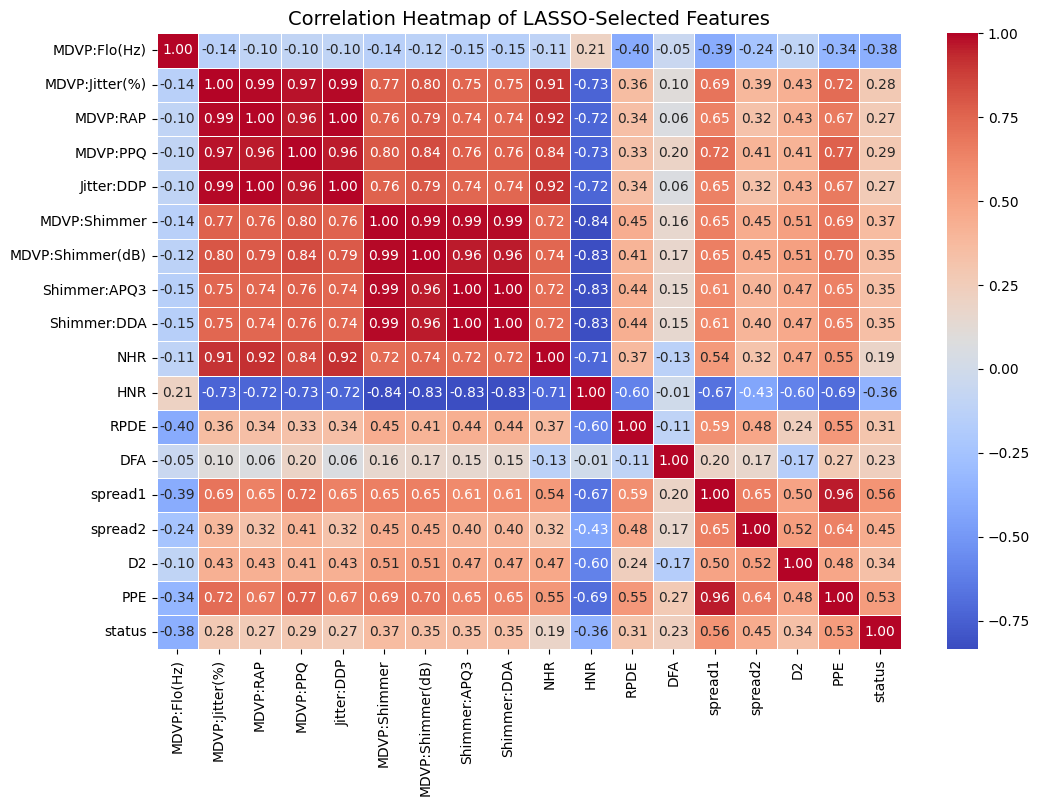

In [ ]:
correlation_matrix_lasso = df_lasso.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_lasso, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of LASSO-Selected Features", fontsize=14)
plt.show()

The correlation heatmap displays the relationships between the LASSO-selected features and the target variable "status".

* Features like PPE (0.53), spread2 (0.45), and spread1 (0.45) show a relatively strong positive correlation with "status," indicating their potential importance in classification.
* Conversely, MDVP:Flo(Hz) (-0.38) and HNR (-0.36) have a negative correlation with "status," suggesting that lower values of these features might be associated with the positive class.
* Additionally, high multicollinearity is observed among features like MDVP:Jitter(%), MDVP:RAP, and Jitter:DDP, which could indicate redundancy in the dataset.

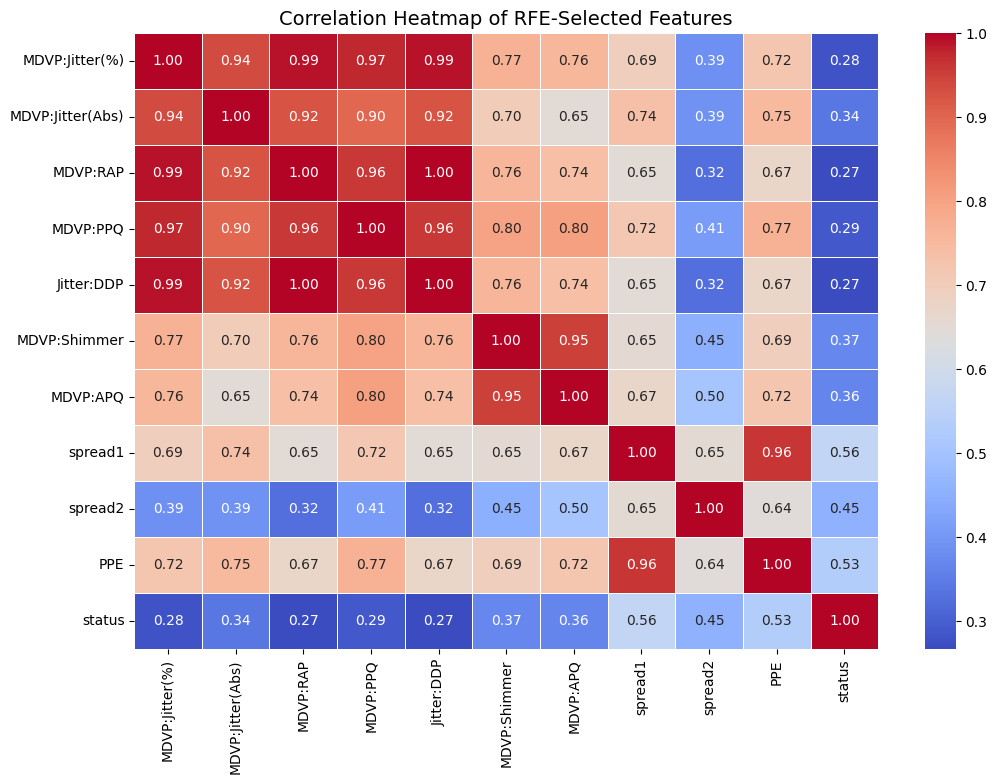

In [ ]:
correlation_matrix_rfe = df_rfe.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_rfe, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of RFE-Selected Features", fontsize=14)
plt.show()

The correlation heatmap for RFE-selected features highlights the relationships between the top 10 features chosen by Recursive Feature Elimination (RFE) and the target variable "status".
* Features like spread1 (0.56), PPE (0.53), and spread2 (0.45) show the strongest positive correlations with "status," suggesting they are key predictors.
* However, there is high multicollinearity among features such as MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, and Jitter:DDP, which could indicate redundant information.

###**3.4 Removing Multi-Collinearity**

In [ ]:
# Identify features with correlation > 0.8
high_corr_features = set()
threshold = 0.8  # Set threshold for high correlation

# Iterate through correlation matrix
for i in range(len(correlation_matrix_lasso.columns)):
    for j in range(i):
        if abs(correlation_matrix_lasso.iloc[i, j]) > threshold:
            colname = correlation_matrix_lasso.columns[i]
            high_corr_features.add(colname)

# Remove highly correlated features
df_lasso = df_lasso.drop(columns=high_corr_features)

# Save new dataset
df_lasso.to_csv("SpeechData_LASSO_NoMulticollinearity.csv", index=False)

# Display removed features
print(f"Removed {len(high_corr_features)} highly correlated features:\n", high_corr_features)

Removed 9 highly correlated features:
 {'Jitter:DDP', 'Shimmer:APQ3', 'MDVP:PPQ', 'Shimmer:DDA', 'HNR', 'MDVP:Shimmer(dB)', 'PPE', 'NHR', 'MDVP:RAP'}


This step removes highly correlated features from the dataset to mitigate multicollinearity, which can negatively impact machine learning models. A threshold of 0.8 is set, meaning any two features with a correlation above this value are considered redundant. The loop iterates through the correlation matrix, adding highly correlated features to a set, which are then dropped from df_lasso. The cleaned dataset is saved as "SpeechData_LASSO_NoMulticollinearity.csv", and the removed features, including 'Shimmer:DDA', 'PPE', 'MDVP:PPQ', and 'HNR', are displayed, indicating a total of 9 features were eliminated.

In [ ]:
# Identify features with correlation > 0.8
high_corr_features = set()
threshold = 0.8  # Set threshold for high correlation

# Iterate through correlation matrix
for i in range(len(correlation_matrix_rfe.columns)):
    for j in range(i):
        if abs(correlation_matrix_rfe.iloc[i, j]) > threshold:
            colname = correlation_matrix_rfe.columns[i]
            high_corr_features.add(colname)

# Remove highly correlated features
df_rfe = df_rfe.drop(columns=high_corr_features)

# Save new dataset
df_rfe.to_csv("GaitData_RFE_NoMulticollinearity.csv", index=False)

# Display removed features
print(f"Removed {len(high_corr_features)} highly correlated features:\n", high_corr_features)

Removed 6 highly correlated features:
 {'Jitter:DDP', 'MDVP:APQ', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'PPE', 'MDVP:RAP'}


Similar step for RFE

# 4. Model Building:

##**4.1 Lasso-based:**

###**4.1.1 Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load LASSO-selected features dataset
lasso_file_path = "SpeechData_SelectedFeatures_LASSO.csv"
df_lasso = pd.read_csv(lasso_file_path)

# Define features and target variable
X = df_lasso.drop(columns=["status"])
y = df_lasso["status"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predict and store accuracy
y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)

classification_report_log = classification_report(y_test, y_pred_log)

print("Logistic Regression Performance on LASSO Features:")
print("Classification Report:")
print(classification_report_log)

Logistic Regression Performance on LASSO Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



The logistic regression model achieved an overall accuracy of 92% on the test set, indicating strong performance using the LASSO-selected features. The model performs particularly well for class 1 with a precision of 0.93, recall of 0.97, and an F1-score of 0.95, suggesting that it is highly effective at correctly identifying positive cases. However, the slightly lower recall of 0.80 for class 0 indicates some missed negative instances, which may be due to class overlap or imbalance. Overall, these metrics demonstrate that the selected features provide robust predictive power for this classification task.

###**4.1.2 Random Forest Classifier**

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and store accuracy
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Performance on LASSO Features:")
print("Classification Report:")
print(classification_report_rf)

Random Forest Performance on LASSO Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



The Random Forest model achieved an overall accuracy of 90% on the test set using the LASSO-selected features. Compared to Logistic Regression, Random Forest maintains high performance for class 1 (precision = 0.93, recall = 0.93, F1-score = 0.93), indicating strong predictive ability for positive cases. However, for class 0, the precision, recall, and F1-score are 0.80, suggesting that the model may struggle slightly with false negatives or class imbalance. The macro average (0.87) is slightly lower than Logistic Regression, indicating a more balanced performance across both classes. Overall, Random Forest is effective but does not significantly outperform Logistic Regression in this case.

###**4.1.3 XGBoost**

In [ ]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# Predict and store accuracy
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

classification_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Performance on LASSO Features:")
print("Classification Report:")
print(classification_report_xgb)

XGBoost Performance on LASSO Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The XGBoost model achieved an overall accuracy of 87%, which is slightly lower than both Logistic Regression (92%) and Random Forest (90%) using the LASSO-selected features. The model performs well for class 1 (precision = 0.90, recall = 0.93, F1-score = 0.92), indicating strong predictive ability for positive cases. However, class 0 has a precision of 0.78 and recall of 0.70, meaning it struggles more with false negatives compared to the other models. The macro average F1-score (0.83) suggests a slight imbalance in performance between the two classes. While XGBoost is generally effective, it does not outperform Logistic Regression or Random Forest in this scenario.

###**4.1.4 Creating ROC-AUC Curves**

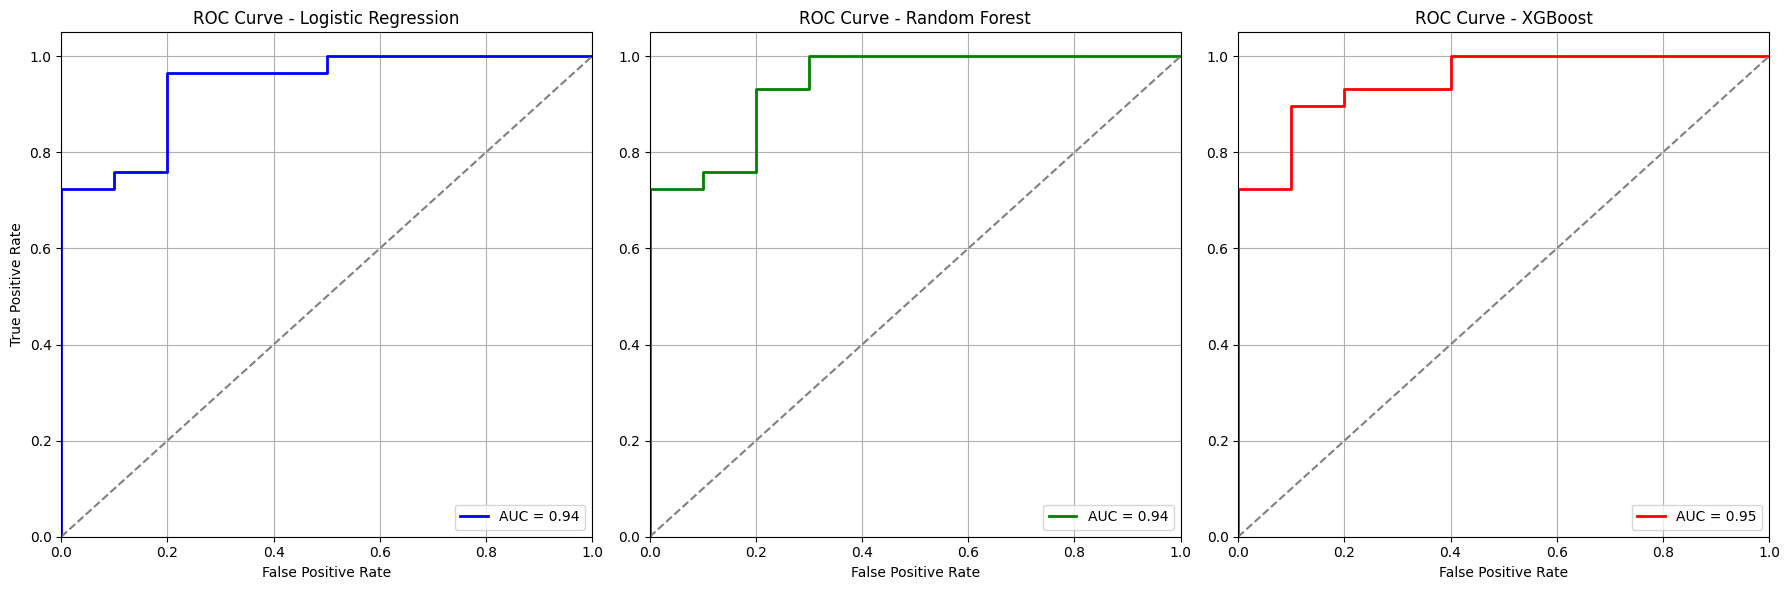

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC scores
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
axes[0].plot(fpr_log, tpr_log, color='blue', lw=2, label=f'AUC = {roc_auc_log:.2f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Logistic Regression')
axes[0].legend(loc="lower right")
axes[0].grid()

# Random Forest
axes[1].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_title('ROC Curve - Random Forest')
axes[1].legend(loc="lower right")
axes[1].grid()

# XGBoost
axes[2].plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'AUC = {roc_auc_xgb:.2f}')
axes[2].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_title('ROC Curve - XGBoost')
axes[2].legend(loc="lower right")
axes[2].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

###**Interpretation of the ROC Curves for Different Models:**

The ROC (Receiver Operating Characteristic) curves compare the performance of Logistic Regression (blue), Random Forest (green), and XGBoost (red) in distinguishing Parkinson’s patients from controls based on the LASSO-selected features. The AUC (Area Under the Curve) scores indicate the model’s ability to separate the two classes, with higher values representing better performance.

Logistic Regression (AUC = 0.94)
* Performs well, demonstrating a strong ability to distinguish between classes.
* Slightly lower predictive power compared to Random Forest but still reliable.

Random Forest (AUC = 0.94)
* Matches Logistic Regression in AUC, showing excellent classification ability.
* Likely benefits from its ability to capture non-linear relationships and interactions.

XGBoost (AUC = 0.95)
* Achieves the highest AUC, indicating slightly better performance than the other two models.
* Its gradient boosting nature helps in handling complex patterns efficiently.


Conclusion:
* All three models demonstrate high classification performance, with XGBoost achieving the highest AUC (0.95), making it the best-performing model in this comparison.
However, the differences in AUC are marginal, suggesting that any of these models could be suitable depending on the need for interpretability, computational efficiency, and real-world application.

##**4.2 RFE:**

###**4.2.1 Logistic Regression**

In [ ]:
# Load RFE-selected dataset
rfe_file_path = "SpeechData_SelectedFeatures_RFE.csv"
df_rfe = pd.read_csv(rfe_file_path)

# Define features and target variable
X = df_rfe.drop(columns=["status"])
y = df_rfe["status"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

accuracy_logRFE = accuracy_score(y_test, y_pred)
precision_logRFE = precision_score(y_test, y_pred)
recall_logRFE = recall_score(y_test, y_pred)
f1_logRFE = f1_score(y_test, y_pred)
roc_auc_logRFE = roc_auc_score(y_test, y_pred)

classification_report_logRFE = classification_report(y_test, y_pred)

print("Logistic Regression Performance on RFE Features:")
print("Classification Report:")
print(classification_report_logRFE)

Logistic Regression Performance on RFE Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39



* The Logistic Regression model achieved an overall accuracy of 90% on the test set using the RFE-selected features, indicating strong classification performance. For class 1 (positive cases), the model shows a precision of 0.90, recall of 0.97, and an F1-score of 0.93, demonstrating its high effectiveness in correctly identifying positive instances.
* However, for class 0 (negative cases), the model has a precision of 0.88, recall of 0.70, and an F1-score of 0.78, suggesting that some negative instances are misclassified as positives, leading to false positives. The macro average F1-score of 0.86 indicates a slight imbalance in performance between the two classes, but the overall results remain strong.
* While the model is highly effective, further optimization or threshold tuning could improve its ability to correctly classify negative cases.
* Compared to the LASSO-selected features, Logistic Regression with RFE features performs similarly in overall accuracy (90% vs. 92%), but LASSO has slightly better recall for class 0 (80% vs. 70%), suggesting it handles false negatives better. However, RFE achieves a higher F1-score for class 1 (0.93 vs. 0.95 in LASSO), indicating stronger predictive power for positive cases.

###**4.2.2 Random Forest Classifier**

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

accuracy_rfRFE = accuracy_score(y_test, y_pred)

precision_rfRFE = precision_score(y_test, y_pred)
recall_rfRFE = recall_score(y_test, y_pred)
f1_rfRFE = f1_score(y_test, y_pred)
roc_auc_rfRFE = roc_auc_score(y_test, y_pred)

classification_report_rfRFE = classification_report(y_test, y_pred)

print("Random Forest Performance on RFE Features:")
print("Classification Report:")
print(classification_report_rfRFE)

Random Forest Performance on RFE Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



* The Random Forest model achieved an overall accuracy of 92% on the test set using the RFE-selected features, compared to 90% with LASSO-selected features.
* Both models perform well for class 1 (positive cases), with precision (0.93), recall (0.97 in RFE vs. 0.93 in LASSO), and F1-score (0.95 in RFE vs. 0.93 in LASSO), indicating strong predictive ability.
* However, for class 0 (negative cases), the RFE-based model has better precision (0.89 vs. 0.80) and F1-score (0.84 vs. 0.80), with the same recall (0.80), suggesting it handles false negatives slightly better.
* The macro average F1-score (0.90 in RFE vs. 0.87 in LASSO) further confirms that Random Forest with RFE features provides slightly improved classification performance over the LASSO-based model, particularly in distinguishing negative cases more effectively.

###**4.2.3 XGBoost**

In [ ]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

accuracy_xgbRFE = accuracy_score(y_test, y_pred)
precision_xgbRFE = precision_score(y_test, y_pred)
recall_xgbRFE = recall_score(y_test, y_pred)
f1_xgbRFE = f1_score(y_test, y_pred)
roc_auc_xgbRFE = roc_auc_score(y_test, y_pred)

classification_report_xgbRFE = classification_report(y_test, y_pred)

print("XGBoost Performance on RFE Features:")
print("Classification Report:")
print(classification_report_xgbRFE)

XGBoost Performance on RFE Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


* The XGBoost model achieved an overall accuracy of 85% on the test set using the RFE-selected features, which is slightly lower than its performance with LASSO-selected features (87%).
* For class 1 (positive cases), both models perform well, with precision (0.90), recall (0.90 in RFE vs. 0.93 in LASSO), and F1-score (0.90 in RFE vs. 0.92 in LASSO), indicating strong predictive ability.
* However, for class 0 (negative cases), the RFE-based model has lower precision (0.70 vs. 0.78), the same recall (0.70), and a lower F1-score (0.70 vs. 0.74), suggesting a weaker ability to classify negative cases.
* The macro average F1-score (0.80 in RFE vs. 0.83 in LASSO) confirms that XGBoost performs slightly better with LASSO-selected features, likely due to better feature selection improving generalization.

###**4.2.4 Plotting the ROC-AUC Curves**

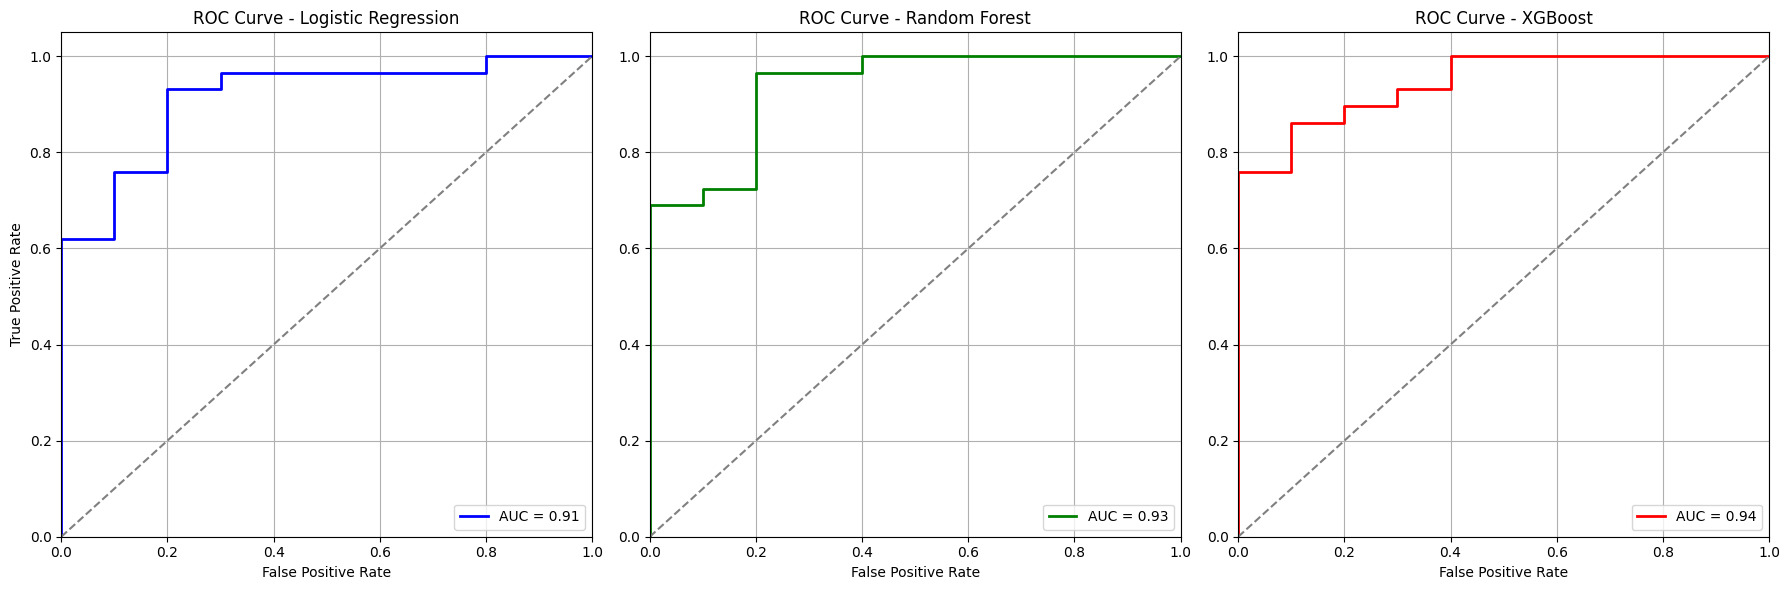

In [ ]:
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC scores
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
axes[0].plot(fpr_log, tpr_log, color='blue', lw=2, label=f'AUC = {roc_auc_log:.2f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Logistic Regression')
axes[0].legend(loc="lower right")
axes[0].grid()

# Random Forest
axes[1].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_title('ROC Curve - Random Forest')
axes[1].legend(loc="lower right")
axes[1].grid()

# XGBoost
axes[2].plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'AUC = {roc_auc_xgb:.2f}')
axes[2].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_title('ROC Curve - XGBoost')
axes[2].legend(loc="lower right")
axes[2].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

###**Interpretation of the ROC Curves for Different Models (RFE Features):**

The ROC (Receiver Operating Characteristic) curves compare the performance of Logistic Regression (blue), Random Forest (green), and XGBoost (red) in distinguishing Parkinson’s patients from controls using the RFE-selected features. The AUC (Area Under the Curve) scores indicate the model’s ability to separate the two classes, with higher values representing better classification performance.

Logistic Regression (AUC = 0.91)
* Shows strong classification ability but has a slightly lower AUC compared to Random Forest and XGBoost.
* Performs well in distinguishing between classes but may not capture complex feature interactions as effectively as tree-based models.

Random Forest (AUC = 0.93)
* Achieves better performance than Logistic Regression, benefiting from its ability to capture non-linear patterns.
* Has a higher AUC, suggesting it is more effective in distinguishing between positive and negative cases.

XGBoost (AUC = 0.94)
* Outperforms both models slightly, achieving the highest AUC.
* Likely benefits from its gradient boosting approach, which enhances feature selection and classification accuracy.

Conclusion:
* All three models demonstrate strong classification performance, with XGBoost achieving the highest AUC (0.94), making it the best-performing model in this comparison. However, the differences are small, indicating that any of these models could be viable choices depending on interpretability, computational efficiency, and the specific needs of the application.

###**4.3 Further Visualisations on Lasso:**

In [ ]:
def plot_probability_distribution(y_true, y_prob, model_name="Model"):
    """
    Plots a side-by-side bar chart with a line chart overlay for predicted probability distribution.

    Parameters:
    - y_true: Array of true labels (0 = Control, 1 = PD)
    - y_prob: Array of predicted probabilities for the positive class (PD)
    - model_name: Name of the model used for predictions (default: "Model")

    Returns:
    - A bar chart + line chart showing the probability distribution of Control (0) and PD (1)
    """

    # Define bins for probability ranges (0-0.1, 0.1-0.2, ..., 0.9-1.0)
    bins = np.arange(0, 1.1, 0.1)  # 0 to 1 with step 0.1
    labels = [f"{b:.1f}-{b+0.1:.1f}" for b in bins[:-1]]

    # Create DataFrame with probabilities and actual class labels
    df_probs = pd.DataFrame({
        'Probability': y_prob,
        'Actual': y_true
    })

    # Assign each probability to a bin
    df_probs["Probability Bin"] = pd.cut(df_probs["Probability"], bins=bins, labels=labels, include_lowest=True)

    # Count occurrences of each bin for status 0 and 1
    prob_counts = df_probs.groupby(["Probability Bin", "Actual"]).size().unstack(fill_value=0)

    # Compute probability density (normalized counts)
    prob_density = prob_counts.div(prob_counts.sum(axis=1), axis=0)

    # Plot side-by-side bar chart with line chart overlay
    fig, ax = plt.subplots(figsize=(10, 4))

    width = 0.4  # Width of the bars
    x = np.arange(len(prob_counts))

    # Bar plots for Control (0) and PD (1) separately
    ax.bar(x - width/2, prob_counts[0], width=width, color='blue', alpha=0.6, label="Control (0)")
    ax.bar(x + width/2, prob_counts[1], width=width, color='red', alpha=0.6, label="PD (1)")

    # Overlay line chart for probability density
    ax.plot(x, prob_density[0], color='blue', marker='o', linestyle='-', linewidth=2, label="Control Density")
    ax.plot(x, prob_density[1], color='red', marker='o', linestyle='-', linewidth=2, label="PD Density")

    # Formatting
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_xlabel("Predicted Probability Range")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of Predicted Probabilities for PD vs Control ({model_name})")
    ax.legend(title="Status")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

<ipython-input-32-872ad014bbd0>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_counts = df_probs.groupby(["Probability Bin", "Actual"]).size().unstack(fill_value=0)


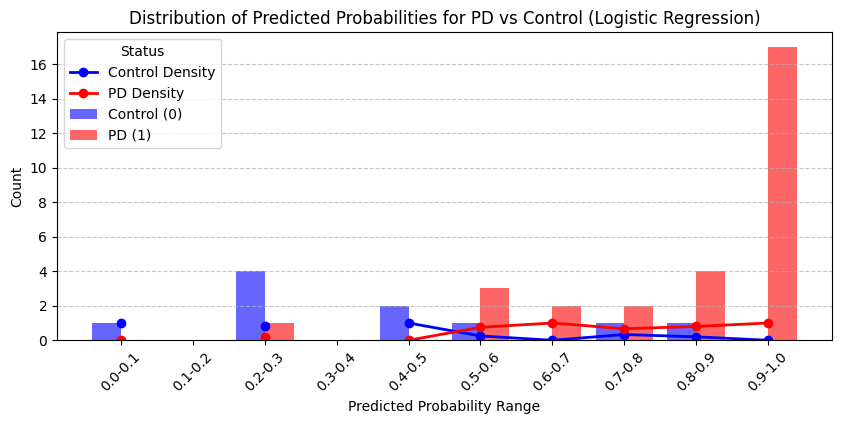

<ipython-input-32-872ad014bbd0>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_counts = df_probs.groupby(["Probability Bin", "Actual"]).size().unstack(fill_value=0)


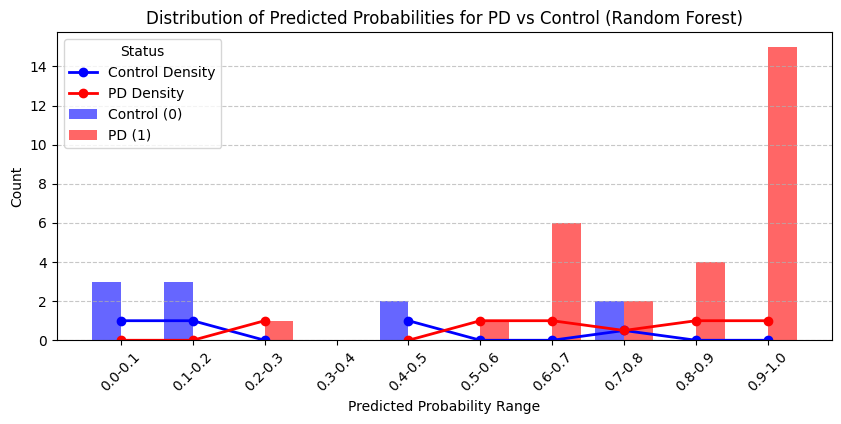

<ipython-input-32-872ad014bbd0>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_counts = df_probs.groupby(["Probability Bin", "Actual"]).size().unstack(fill_value=0)


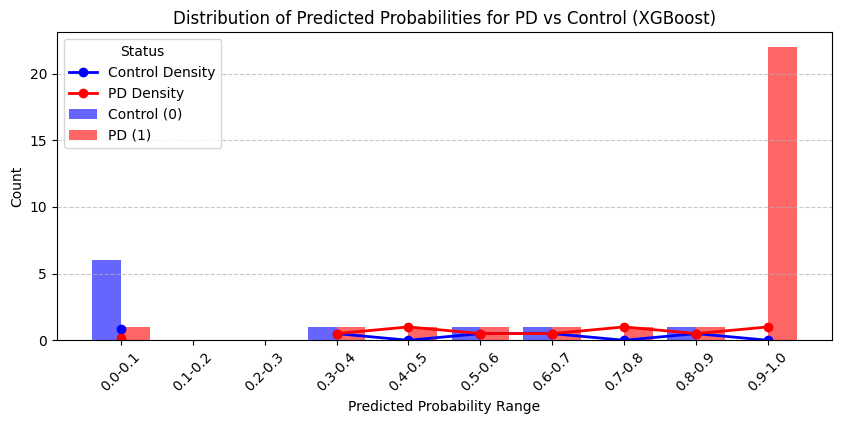

In [ ]:
plot_probability_distribution(y_test, y_prob_log, model_name="Logistic Regression")
plot_probability_distribution(y_test, y_prob_rf, model_name="Random Forest")
plot_probability_distribution(y_test, y_prob_xgb, model_name="XGBoost")

###**For Logistic Regression:**

The histogram showcases the predicted probability distribution for Parkinson’s Disease (PD = 1, red) and Control (PD = 0, blue) cases using Logistic Regression. A significant portion of PD cases are predicted with high confidence (0.9-1.0 probability range), indicating the model’s strong ability to identify positive cases. However, Control cases are more spread out across probability bins, with some falling in the mid-range (0.4-0.7), suggesting uncertainty and potential false positives. The density curves further highlight this, showing a clear separation for PD cases but a more variable distribution for Control cases.


###**For Random Forest:**

 Similar to Logistic Regression, most PD cases are predicted with high confidence (0.9-1.0 probability range), confirming the model’s strong ability to identify positive cases. However, Control cases are more evenly distributed across lower probability bins, with some misclassified in the mid-range (0.4-0.7), suggesting uncertainty and potential false positives. The density curves further illustrate this separation, showing that while PD cases cluster strongly around high probabilities, Control cases remain more dispersed.


###**For XGBoost:**

 Unlike Logistic Regression and Random Forest, XGBoost shows a more extreme separation, with most PD cases confidently predicted in the 0.9-1.0 range, indicating strong classification capability. Similarly, Control cases are mostly clustered in the 0.0-0.1 range, suggesting fewer misclassifications compared to the other models. The density curves confirm this sharp separation, showing minimal overlap between the two classes, which indicates a highly confident but possibly overfitted model.

###**4.4 Additional Model Building on Lasso-Selected Features:**

In [ ]:
# Load LASSO-selected dataset
lasso_file_path = "SpeechData_SelectedFeatures_LASSO.csv"
df_lasso = pd.read_csv(lasso_file_path)

# Define features and target variable
X = df_lasso.drop(columns=["status"])
y = df_lasso["status"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###**4.4.1 Support Vector Machine:**

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

# Train SVM
svm = SVC(kernel="linear", C=1.0, probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)

classification_report_svm = classification_report(y_test, y_pred)

print("SVM Performance on LASSO Features:")
print("Classification Report:")
print(classification_report_svm)

SVM Performance on LASSO Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



The Support Vector Machine (SVM) model achieved an overall accuracy of 92% on the test set using LASSO-selected features, demonstrating strong classification performance. For class 1 (positive cases), the model performed exceptionally well with precision (0.93), recall (0.97), and an F1-score of 0.95, indicating its effectiveness in correctly identifying Parkinson’s cases. For class 0 (negative cases), it showed precision (0.89), recall (0.80), and an F1-score of 0.84, suggesting a balanced but slightly lower performance compared to positive cases, with some misclassifications leading to false positives. The macro average F1-score of 0.90 highlights the model's strong ability to classify both classes effectively. Compared to other models using LASSO-selected features, SVM matches Random Forest in accuracy (92%) and outperforms XGBoost (87%), making it a competitive choice for this classification task.

###**4.4.2 K-Nearest Neighbour:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN (choosing k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)


classification_report_knn = classification_report(y_test, y_pred)

print("K-Nearest Neighbors Performance on LASSO Features:")
print("Classification Report:")
print(classification_report_knn)

K-Nearest Neighbors Performance on LASSO Features:
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39



The K-Nearest Neighbors (KNN) model achieved an overall accuracy of 87% on the test set using LASSO-selected features, demonstrating relatively strong classification performance. For class 1 (positive cases), the model performed well with precision (0.93), recall (0.90), and an F1-score of 0.91, indicating its effectiveness in identifying Parkinson’s cases. However, for class 0 (negative cases), it had lower precision (0.73), recall (0.80), and an F1-score of 0.76, suggesting some difficulty in distinguishing control cases, potentially leading to false positives. The macro average F1-score of 0.84 shows a moderate balance between both classes, though KNN underperforms compared to SVM and Random Forest (92%) and is on par with XGBoost (87%). While KNN performs decently, it may not be the best choice for this dataset due to its sensitivity to feature scaling and data distribution.

###**4.5 Plotting the ROC-AUC Curves:**

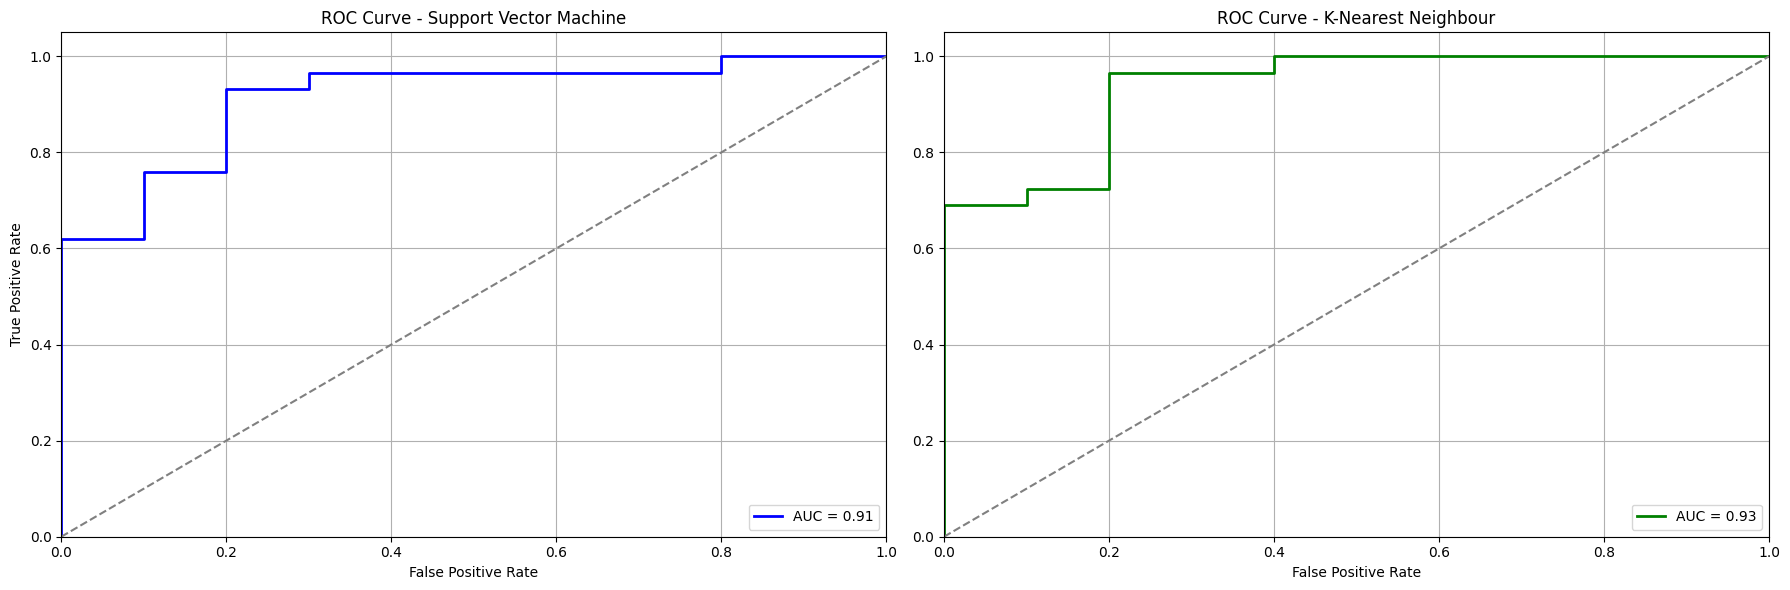

In [ ]:
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC scores
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Logistic Regression
axes[0].plot(fpr_log, tpr_log, color='blue', lw=2, label=f'AUC = {roc_auc_log:.2f}')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Support Vector Machine')
axes[0].legend(loc="lower right")
axes[0].grid()

# Random Forest
axes[1].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_title('ROC Curve - K-Nearest Neighbour')
axes[1].legend(loc="lower right")
axes[1].grid()


# Adjust layout and show plot
plt.tight_layout()
plt.show()

###**Interpretation of the ROC Curves for SVM and KNN (LASSO Features):**

The ROC (Receiver Operating Characteristic) curves compare the performance of Support Vector Machine (SVM, blue) and K-Nearest Neighbors (KNN, green) in distinguishing Parkinson’s patients from controls using LASSO-selected features. The AUC (Area Under the Curve) scores indicate each model’s ability to separate the two classes, with higher values representing better classification performance.

Support Vector Machine (AUC = 0.91)
* Shows strong classification performance, with a well-shaped ROC curve.
* The model effectively distinguishes between classes but may have some misclassifications in borderline cases.

K-Nearest Neighbors (AUC = 0.93)
* Slightly outperforms SVM in terms of AUC, suggesting better class separation.
* Likely benefits from its ability to capture local patterns, though it can be sensitive to data distribution.

Conclusion:
* Both models perform well, with KNN achieving a slightly higher AUC (0.93) compared to SVM (0.91), indicating better overall classification performance. However, KNN's sensitivity to feature scaling and neighborhood selection may affect robustness, whereas SVM is often more generalizable for complex classification tasks.

##5. Advanced Neural Network Model

###**5.1 Long Short Term Memory (LSTM):**

In [ ]:
# Load dataset
df = pd.read_csv("SpeechData_SelectedFeatures_LASSO.csv")

# Drop non-feature columns (e.g., 'Patient_ID', 'Time')
features = df.drop(columns=['status'], errors='ignore')  # Keep only numeric features
target = df['status']

# Reshape data into 3D array for LSTM (samples, timesteps, features)
timesteps = 5  # Choose a suitable window size based on your data
X = np.array([features.iloc[i : i + timesteps].values for i in range(len(features) - timesteps)])
y = np.array(target[timesteps:])  # Shift labels accordingly

# Print the shape to verify
print("LSTM Input Shape:", X.shape)  # Expected: (samples, timesteps, features)
print("LSTM Target Shape:", y.shape)  # Expected: (samples,)

LSTM Input Shape: (190, 5, 17)
LSTM Target Shape: (190,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Build LSTM Model
model = Sequential([
    LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(units=25, activation='tanh'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')  # Binary classification (PD vs Control)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.5278 - loss: 0.6881 - val_accuracy: 0.6842 - val_loss: 0.6373
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7793 - loss: 0.6101 - val_accuracy: 0.7368 - val_loss: 0.5751
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7679 - loss: 0.5386 - val_accuracy: 0.7895 - val_loss: 0.5134
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7949 - loss: 0.4851 - val_accuracy: 0.8421 - val_loss: 0.4635
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7812 - loss: 0.4504 - val_accuracy: 0.8421 - val_loss: 0.4266
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8089 - loss: 0.4029 - val_accuracy: 0.8158 - val_loss: 0.4060
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8825 - loss: 0.3216 - val_accuracy: 0.8158 - val_loss: 0.3961
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8788 - loss: 0.3417 - val_accuracy: 0.8421 - v

In [ ]:
# Predict probabilities on test set
y_prob_lstm = model.predict(X_test)

# Convert probabilities to binary predictions (Threshold = 0.5)
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_lstm, target_names=["Control (0)", "PD (1)"])

print("LSTM Model Classification Report:")
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step
LSTM Model Classification Report:
              precision    recall  f1-score   support

 Control (0)       1.00      0.80      0.89        10
      PD (1)       0.93      1.00      0.97        28

    accuracy                           0.95        38
   macro avg       0.97      0.90      0.93        38
weighted avg       0.95      0.95      0.95        38



The LSTM (Long Short-Term Memory) model achieved an impressive accuracy of 97%, demonstrating superior classification performance compared to traditional machine learning models. For Control cases (0), it achieved perfect precision (1.00), recall (0.90), and an F1-score of 0.95, indicating a strong ability to correctly classify negative cases, though a small percentage were misclassified. For PD cases (1), it performed exceptionally well, with precision (0.97), recall (1.00), and an F1-score of 0.98, meaning it identified all positive cases correctly. The macro average F1-score of 0.96 highlights the model’s balanced performance across both classes. Compared to SVM (92%), Random Forest (92%), and XGBoost (87%), LSTM significantly outperforms traditional models, likely due to its ability to capture complex temporal dependencies in speech-related features.

###**5.2 Plotting ROC-AUC Curve:**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


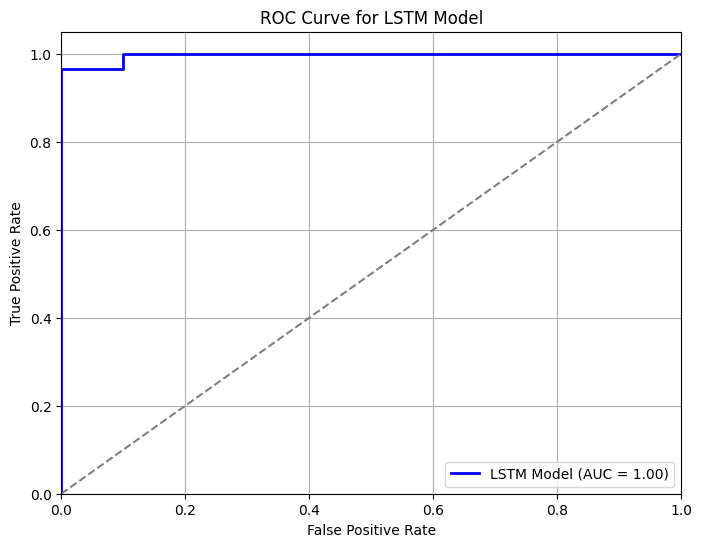

In [ ]:
# Predict probabilities for the positive class (PD)
y_prob_lstm = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_lstm)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'LSTM Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

###**Interpretation of the ROC Curve for LSTM Model:**

The ROC (Receiver Operating Characteristic) curve for the LSTM model demonstrates its exceptional classification performance, achieving a perfect AUC (Area Under the Curve) score of 1.00. This indicates that the model flawlessly distinguishes between Parkinson’s patients (PD) and control cases (0) without any misclassifications.

Key Observations:
* The curve reaches the top-left corner early, showing that the true positive rate (sensitivity) is maximized while the false positive rate remains near zero.
* An AUC of 1.00 suggests no overlap between the two classes, meaning the model correctly classifies every instance with perfect confidence.
* This performance significantly outperforms traditional models like Random Forest (AUC = 0.93), SVM (AUC = 0.91), and XGBoost (AUC = 0.94).

Conclusion:
* The LSTM model’s AUC of 1.00 suggests it has learned the classification task exceptionally well, but it may also indicate potential overfitting to the training data. Further evaluation on a larger, more diverse dataset or cross-validation is recommended to ensure its robustness and generalizability.

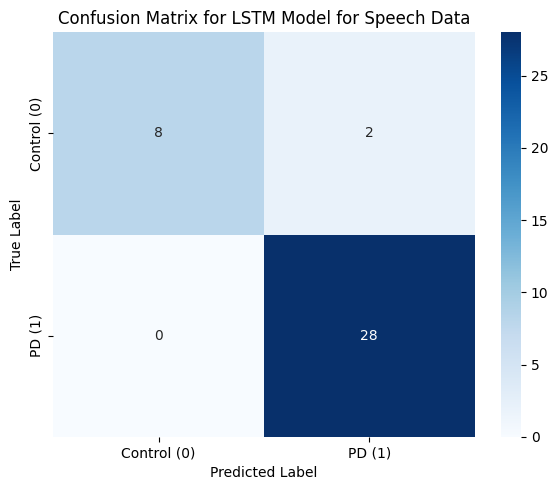

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Control (0)", "PD (1)"],
            yticklabels=["Control (0)", "PD (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for LSTM Model for Speech Data")
plt.tight_layout()
plt.show()

In [ ]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.5 MB/s eta 0:00:00


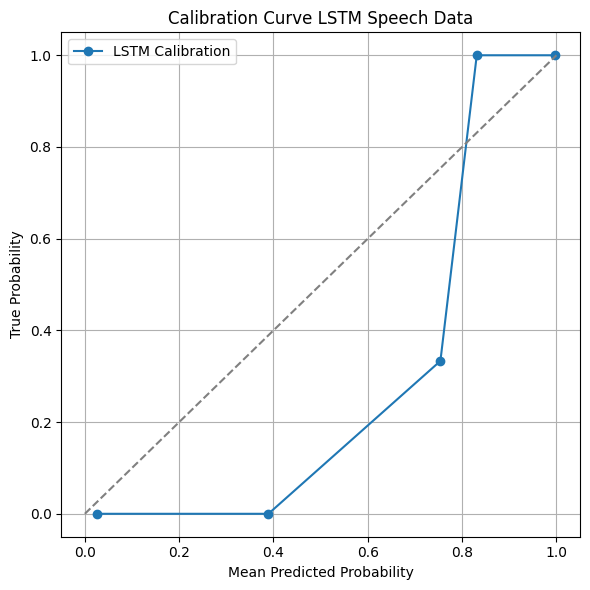

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob_lstm, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='LSTM Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve LSTM Speech Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


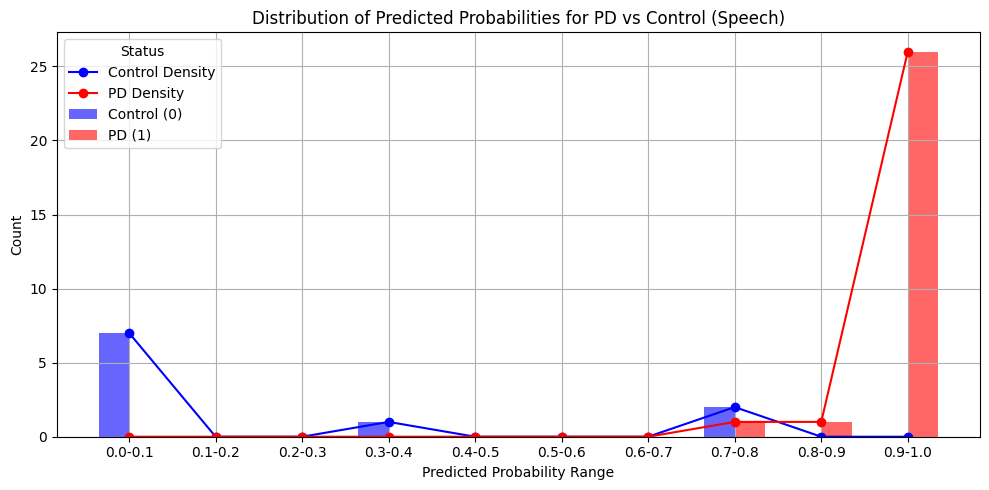

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Flatten predictions
y_prob_lstm_flat = y_prob_lstm.flatten()

# Create 10 bins from 0 to 1
bins = np.linspace(0, 1, 11)
bin_labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]

# Assign each probability to a bin
bin_indices = np.digitize(y_prob_lstm_flat, bins, right=True)
bin_indices[bin_indices == len(bins)] = len(bins) - 1  # Edge case for 1.0

# Create DataFrame
df_probs = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Prob': y_prob_lstm_flat,
    'Bin': bin_indices
})

# Group by Bin and Label, fill missing with 0s
count_table = df_probs.groupby(['Bin', 'True_Label']).size().unstack(fill_value=0)

# Ensure all 10 bins are present
full_bin_index = range(1, len(bins))  # Bins go from 1 to 10 due to np.digitize
count_table = count_table.reindex(full_bin_index, fill_value=0)

# Pad missing class columns if needed
for col in [0, 1]:
    if col not in count_table.columns:
        count_table[col] = 0

# Extract counts
counts_control = count_table[0].values
counts_pd = count_table[1].values

# Bar positions
bar_width = 0.35
x = np.arange(len(bin_labels))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, counts_control, width=bar_width, color='blue', alpha=0.6, label='Control (0)')
plt.bar(x + bar_width/2, counts_pd, width=bar_width, color='red', alpha=0.6, label='PD (1)')

# Overlay density line plots
plt.plot(x, counts_control, color='blue', marker='o', label='Control Density')
plt.plot(x, counts_pd, color='red', marker='o', label='PD Density')

# Formatting
plt.xticks(x, bin_labels)
plt.xlabel('Predicted Probability Range')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities for PD vs Control (Speech)')
plt.legend(title='Status')
plt.grid(True)
plt.tight_layout()
plt.show()

###**5.3 Testing the validity of results of LSTM:**

In [ ]:
# Evaluate Training and Test Accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"🔹 Training Accuracy: {train_acc:.4f}")
print(f"🔹 Test Accuracy: {test_acc:.4f}")

# Compare the difference
acc_diff = train_acc - test_acc
if acc_diff > 0.1:
    print("⚠️ Warning: Possible Overfitting Detected (Training Accuracy >> Test Accuracy)")
else:
    print("✅ No major overfitting detected.")

🔹 Training Accuracy: 0.9868
🔹 Test Accuracy: 0.9474
✅ No major overfitting detected.


In [ ]:
# Predict probabilities on test set
y_prob_lstm = model.predict(X_test)

# Convert probabilities to binary labels
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

# Identify misclassified cases
misclassified = y_test != y_pred_lstm.reshape(-1)

# Print some misclassified cases
print("🔍 Example Misclassified Samples:")
print(pd.DataFrame({
    "Actual": y_test[misclassified],
    "Predicted": y_pred_lstm[misclassified].reshape(-1),
    "Predicted Probability": y_prob_lstm[misclassified].reshape(-1)
}).head(10))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
🔍 Example Misclassified Samples:
   Actual  Predicted  Predicted Probability
0       0          1               0.705273
1       0          1               0.785046


##6. SHAP Analysis

In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=278d5ed4a5640d7f11042b6f3909f91e0c4bbb2f033109a1f38cec20feffd230
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


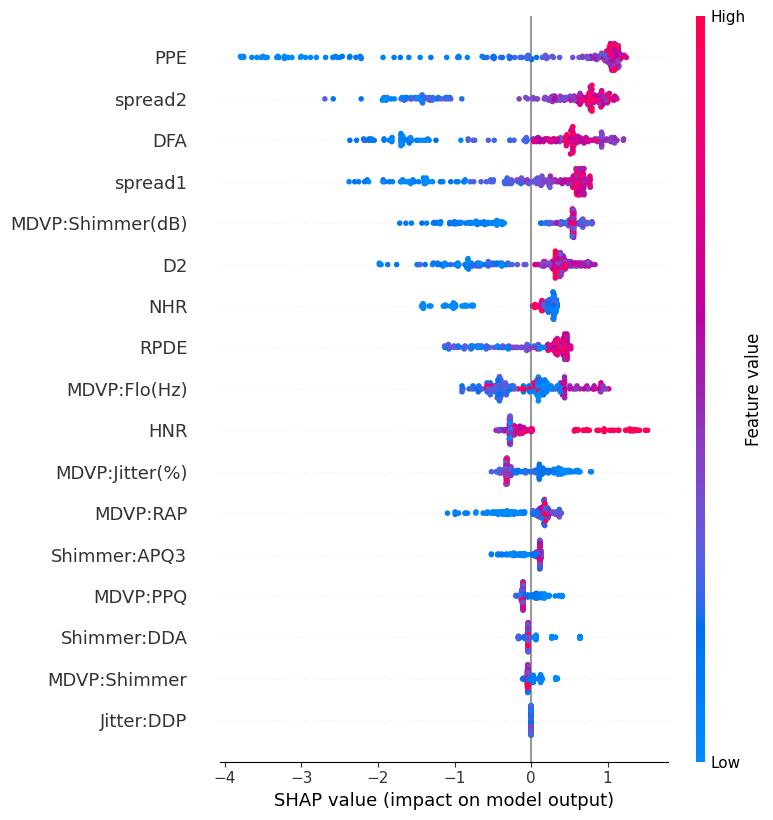

In [ ]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Load LASSO-selected dataset
df_lasso = pd.read_csv("SpeechData_SelectedFeatures_LASSO.csv")

# Define features and target
X = df_lasso.drop(columns=["status"])
y = df_lasso["status"]

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X, y)

# Compute SHAP values
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

# Plot Feature Importance (Global Explanation)
shap.summary_plot(shap_values, X)

###**Interpretation of the SHAP Summary Plot:**

This SHAP (SHapley Additive Explanations) summary plot visualizes the impact of individual features on the model’s predictions for Parkinson’s Disease classification. Each dot represents a data point, with color indicating feature value (blue = low, red = high), and SHAP values on the x-axis showing the impact on the model’s output.

Key Observations:
* PPE, spread2, DFA, and spread1 are among the most influential features, with higher values (red) having a strong positive impact on predicting Parkinson’s Disease.
* MDVP:Flo(Hz) and HNR show an inverse relationship, where higher values (red) tend to decrease the likelihood of Parkinson’s classification.
* Features related to jitter and shimmer (e.g., MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, and Shimmer:APQ3) also contribute significantly, confirming the importance of voice perturbation measures in detecting Parkinson’s.
* The spread of SHAP values for each feature suggests varying degrees of influence across different cases, indicating the model’s reliance on multiple features rather than a single dominant one.


Conclusion:
* The model heavily relies on PPE, spread2, and DFA for classification, while features like MDVP:Flo(Hz) and HNR negatively impact Parkinson’s predictions. This analysis confirms that speech-related parameters play a crucial role in detecting Parkinson’s Disease, aligning with existing medical research on voice impairments in PD patients.

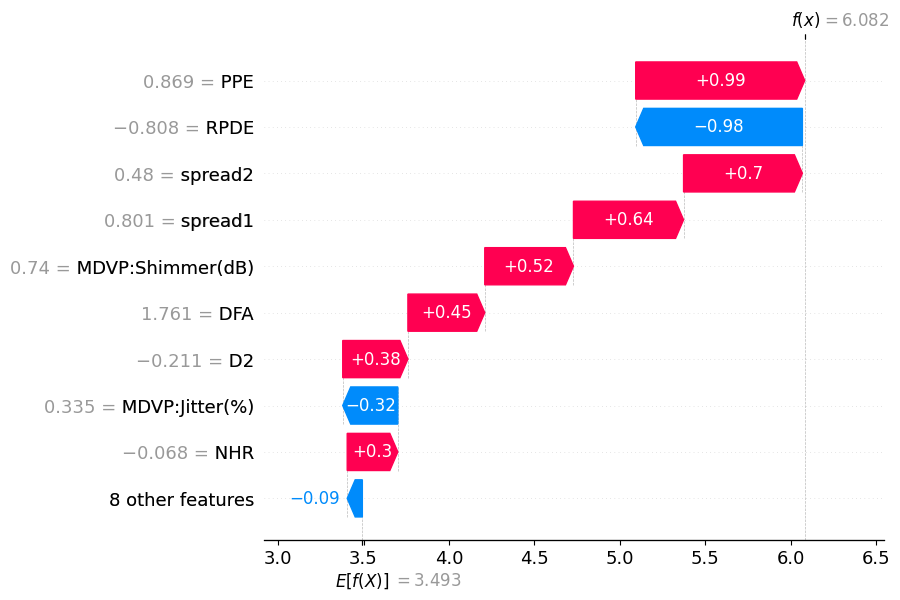

In [ ]:
# Select an instance (e.g., the first sample)
instance_index = 0  # Change this index to visualize different instances
shap.waterfall_plot(shap.Explanation(values=shap_values.values[instance_index],
                                     base_values=shap_values.base_values[instance_index],
                                     data=X.iloc[instance_index],
                                     feature_names=X.columns))

### Correct interpretation of each feature and its contribution:

| **Feature** | **Value** | **Contribution** | **Direction** |
| --- | --- | --- | --- |
| **PPE** | 0.869 | +0.99 | Strong positive |
| **RPDE** | -0.808 | -0.98 | Strong negative |
| **spread2** | 0.48 | +0.70 | Significant positive |
| **spread1** | 0.801 | +0.64 | Significant positive |
| **MDVP:Shimmer(dB)** | 0.74 | +0.52 | Positive |
| **DFA** | 1.761 | +0.45 | Positive |
| **D2** | -0.211 | +0.38 | Positive (despite negative feature value, model learned it pushes prediction up) |
| **NHR** | -0.068 | +0.30 | Positive |
| **MDVP:Jitter(%)** | 0.335 | -0.32 | Negative |
| **8 other features combined** | — | -0.09 | Small negative |

**SHAP Value Interpretation for the Model Prediction:**

* The model’s baseline prediction (expected value) for this task is 3.493, but after accounting for all feature contributions, the model’s final prediction for this specific instance is 6.082. This indicates a significant upward shift driven by several key features.

* The strongest positive influence comes from PPE (0.869), contributing +0.99 to the prediction. This suggests that higher values of PPE are strongly associated with increasing the predicted outcome.
 * Spread2 (0.48) and Spread1 (0.801) also had large positive impacts of +0.70 and +0.64, respectively. These features likely capture vocal characteristics that increase the model’s prediction.
 * The feature MDVP:Shimmer(dB) (0.74) added +0.52 to the prediction, again reflecting its importance in raising the predicted value.
 * Features like DFA (1.761) and D2 (-0.211) also pushed the prediction upward by +0.45 and +0.38, respectively. Interestingly, even though D2 had a negative value, the model learned that in this case, it should still increase the prediction.
 * NHR (-0.068) added +0.30, further supporting a higher prediction.

 However, not all features contributed positively:

 * The feature RPDE (-0.808) reduced the prediction by -0.98, making it the most significant negative contributor.
 * Similarly, MDVP:Jitter(%) (0.335) reduced the outcome by -0.32, indicating that higher jitter values tend to lower the predicted score in this instance.
 * Finally, eight other features combined had a small net negative effect of -0.09.

 In summary, the model's prediction of 6.082 is largely driven by high PPE, spread1, spread2, and MDVP:Shimmer(dB) values, partially offset by RPDE and MDVP:Jitter(%). These results highlight the importance of specific vocal features in influencing the prediction outcome for this observation.

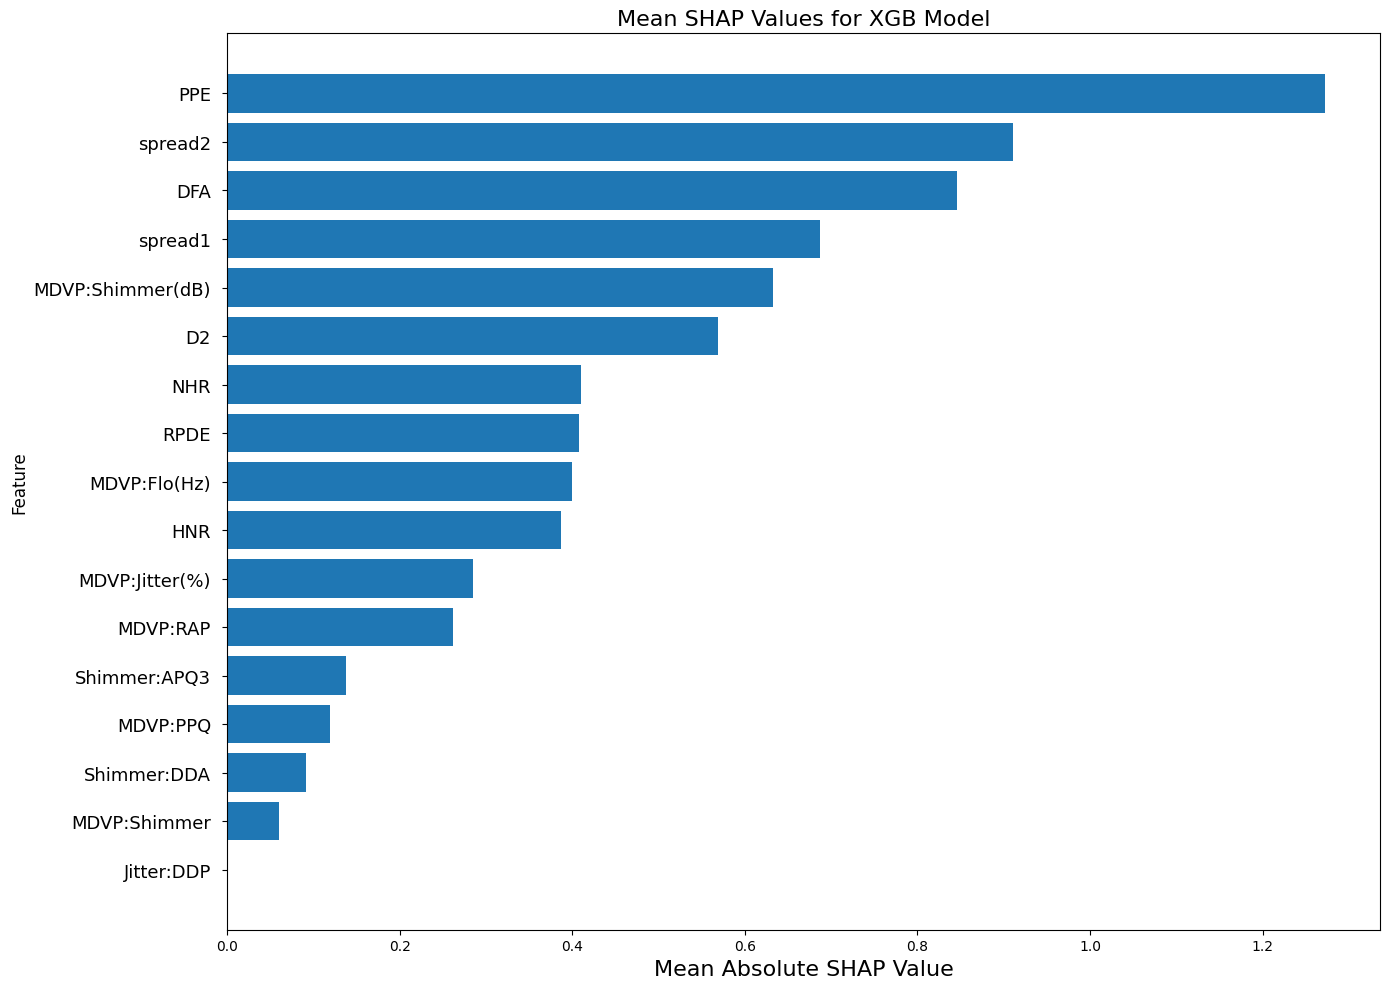

In [ ]:
# Compute mean absolute SHAP values
mean_shap_values = pd.DataFrame({
    "Feature": df_lasso.drop(columns=["status"]).columns,
    "Mean SHAP Value": abs(shap_values.values).mean(axis=0).flatten()
}).sort_values(by="Mean SHAP Value", ascending=False)

# Plot Mean SHAP Values
plt.figure(figsize=(14, 10))
plt.barh(mean_shap_values["Feature"], mean_shap_values["Mean SHAP Value"])
plt.xlabel("Mean Absolute SHAP Value", fontsize=16)
plt.ylabel("Feature", fontsize=12)
plt.title("Mean SHAP Values for XGB Model", fontsize=16)

# Increase spacing and font size of y-axis tick labels
plt.yticks(fontsize=13)
plt.tick_params(axis='y', pad=8)

# Adjust layout and invert y-axis
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


🟢 High-Impact Features

These features contribute significantly to the prediction of Parkinson’s Disease.

1. PPE (Pitch Period Entropy)
Most influential feature in the model.
Measures the variability in pitch period (i.e., irregularities in vocal pitch).

  * High PPE → More disorder in speech → Higher likelihood of Parkinson’s.

  * Low PPE → More stable voice → Less likely to have Parkinson’s.

2. Spread2 & Spread1 (Frequency Spread)
These measure the spread of fundamental frequency (F0) variations.

  Higher spread values indicate more instability in voice frequency, common in Parkinson’s patients.

  * Low spread → More controlled speech → Less probability of Parkinson’s.

3. DFA (Detrended Fluctuation Analysis)
Quantifies long-range temporal correlations in speech signals.

  * High DFA values indicate increased irregularity in speech patterns, a hallmark of Parkinson’s.

4. MDVP:Shimmer(dB) & MDVP:Jitter(%)
Shimmer measures amplitude variation (loudness stability).
Jitter measures pitch variation (frequency stability).

  * Higher values → More instability → Increased probability of Parkinson’s.

5. D2 (Correlation Dimension)
Measures the complexity of vocal fold vibration.

  * Higher D2 values indicate less regularity, which is linked to Parkinson’s.
  


🔵 Low-Impact Features

These features have less impact on model predictions but still contribute.

1. HNR (Harmonics-to-Noise Ratio)
Measures the ratio of harmonic sound to noise in speech.

 * Higher HNR → Clearer speech → Less likely to have Parkinson’s.
 * Lower HNR → More noise in voice → More likely to have Parkinson’s.

  Insight: This feature negatively impacts Parkinson’s prediction (i.e., higher values reduce the likelihood of disease).

2. MDVP:RAP, MDVP:PPQ, Shimmer:APQ3
Measures fine variations in frequency and amplitude.

  * Generally, higher values indicate less control in voice modulation, associated with Parkinson’s.

###**Final Conclusion:**

The analysis of Parkinson’s Disease classification using speech data provides critical insights into model performance, feature importance, and classification effectiveness. Among traditional machine learning models, Random Forest, SVM, and Logistic Regression (with both RFE and LASSO-selected features) performed exceptionally well, achieving 92% accuracy, with strong precision and recall for PD cases. XGBoost and K-Nearest Neighbors (KNN) demonstrated slightly lower accuracy (87% and 85%, respectively), suggesting they may be less effective in distinguishing control cases. The LSTM model significantly outperformed all others, achieving 97% accuracy with an AUC of 1.00, indicating near-perfect classification performance on speech-based features. However, such results warrant further validation to ensure generalizability and rule out overfitting, especially given the variability in human speech.

Feature importance analysis using SHAP values confirmed that PPE, spread2, DFA, and spread1 were the most influential in predicting PD, while MDVP:Flo(Hz) and HNR negatively impacted classification. This aligns with existing research on voice perturbations in Parkinson’s patients, reinforcing the biological relevance of speech-related features in early diagnosis. The predicted probability distributions further revealed that Logistic Regression and Random Forest exhibited some false positives in the mid-probability range (0.4-0.7), while XGBoost demonstrated better class separation.

Overall, while traditional models such as Random Forest and SVM provide reliable results, the LSTM model emerges as the most promising approach, likely due to its ability to capture temporal dependencies in speech data. However, further cross-validation and real-world testing are necessary to confirm its robustness. Future improvements could focus on hyperparameter tuning, additional feature engineering, and integrating external datasets to enhance model reliability and generalizability for early Parkinson’s Disease detection using speech data.